In [ ]:
# 코랩이 아닐 시 본 셀은 주석처리 
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install apyori

In [ ]:
import pandas as pd
import numpy as np
import os 

import seaborn as sns 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

# 연관규칙분석 

from apyori import apriori as anet
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import math

In [ ]:
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [ ]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False          # 마이너스 표기 오류 방지 


NanumBarunGothic


In [ ]:
# seaborn 그래프 크기 Default 세팅

sns.set(rc={'figure.figsize':(15 ,10)})

In [ ]:
base_dir = "/content/gdrive/My Drive/Colab Notebooks/POSCO_ACADEMY/bigdata_project/data/processed_data/"

data_file = 'sales_member_join_processed.csv'

In [ ]:
raw_data =  pd.read_csv(base_dir + data_file, sep ="," ,encoding = 'utf-8')

In [ ]:
raw_data.head()

,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,item_g_l,item_g_m,item_g_s,item_name,purchase_cnt,unit_cost,purchase_amt,birth_date,gender,age,agegroup,customer_type,customer_grade,gaip_date,taltoi_date,member_month,gaip_path,flag_member,flag_rcv_sms,flag_rcv_email,flag_rcv_post,zipcode,sigun,dong,ri,address
0,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,14:47:04,2018-01-10,P08010117,간식,과자,스낵,꼬마찹쌀모나카(112g/8개),1,3000,3000,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
1,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,14:47:04,2018-01-10,P09040101,양념/가루,장,간장,제주전통어간장(500ml),1,7900,7900,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
2,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,14:47:04,2018-01-10,P09040100,양념/가루,장,간장,맛간장(900ml),1,13600,13600,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
3,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,11:59:24,2018-10-08,P09010305,양념/가루,가루,곡식가루,엿기름가루(무/500g),2,3200,6400,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
4,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,11:59:24,2018-10-08,P09010301,양념/가루,가루,곡식가루,메주가루(500g),2,11000,22000,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동


In [ ]:
data = raw_data

# 전체 주문 고객 

In [ ]:
len(data)

273295

In [ ]:
data.head()

,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,item_g_l,item_g_m,item_g_s,item_name,purchase_cnt,unit_cost,purchase_amt,birth_date,gender,age,agegroup,customer_type,customer_grade,gaip_date,taltoi_date,member_month,gaip_path,flag_member,flag_rcv_sms,flag_rcv_email,flag_rcv_post,zipcode,sigun,dong,ri,address
0,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,14:47:04,2018-01-10,P08010117,간식,과자,스낵,꼬마찹쌀모나카(112g/8개),1,3000,3000,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
1,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,14:47:04,2018-01-10,P09040101,양념/가루,장,간장,제주전통어간장(500ml),1,7900,7900,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
2,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,14:47:04,2018-01-10,P09040100,양념/가루,장,간장,맛간장(900ml),1,13600,13600,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
3,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,11:59:24,2018-10-08,P09010305,양념/가루,가루,곡식가루,엿기름가루(무/500g),2,3200,6400,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
4,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,11:59:24,2018-10-08,P09010301,양념/가루,가루,곡식가루,메주가루(500g),2,11000,22000,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동


# 연관규칙분석 (장바구니 분석 )

In [ ]:
# purchase ID를 오름차순 정렬
data = data.sort_values(by = ['purchase_id'], axis=0, ascending=True, inplace=False)
data

,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,item_g_l,item_g_m,item_g_s,item_name,purchase_cnt,unit_cost,purchase_amt,birth_date,gender,age,agegroup,customer_type,customer_grade,gaip_date,taltoi_date,member_month,gaip_path,flag_member,flag_rcv_sms,flag_rcv_email,flag_rcv_post,zipcode,sigun,dong,ri,address
0,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,14:47:04,2018-01-10,P08010117,간식,과자,스낵,꼬마찹쌀모나카(112g/8개),1,3000,3000,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
1,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,14:47:04,2018-01-10,P09040101,양념/가루,장,간장,제주전통어간장(500ml),1,7900,7900,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
2,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,14:47:04,2018-01-10,P09040100,양념/가루,장,간장,맛간장(900ml),1,13600,13600,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
3,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,11:59:24,2018-10-08,P09010305,양념/가루,가루,곡식가루,엿기름가루(무/500g),2,3200,6400,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
4,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,11:59:24,2018-10-08,P09010301,양념/가루,가루,곡식가루,메주가루(500g),2,11000,22000,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273291,C705016,C705016_20191222_46,서귀포매장,2019M12,일요일,14,2019-12-22,14:52:43,2019-12-22,P08010301,간식,과자,한과/유과,차례상약과(350g/10개),1,8800,8800,1976-01-23,여,44,40대,일반,2Platinum,2019-12-04,NaN,1,인터넷,Y,Y,N,Y,699-900,서귀포시,성산읍,NaN,제주 서귀포시 성산읍
273290,C705016,C705016_20191222_46,서귀포매장,2019M12,일요일,14,2019-12-22,14:52:43,2019-12-22,P01010104,주곡,멥쌀,백미,백미/유(4kg)-매장용,1,15700,15700,1976-01-23,여,44,40대,일반,2Platinum,2019-12-04,NaN,1,인터넷,Y,Y,N,Y,699-900,서귀포시,성산읍,NaN,제주 서귀포시 성산읍
273292,C705016,C705016_20191222_46,서귀포매장,2019M12,일요일,14,2019-12-22,14:52:43,2019-12-22,P06040300,축산물,유제품,아이스크림,유기농아이스크림(기본형),1,8900,8900,1976-01-23,여,44,40대,일반,2Platinum,2019-12-04,NaN,1,인터넷,Y,Y,N,Y,699-900,서귀포시,성산읍,NaN,제주 서귀포시 성산읍
273293,C705016,C705016_20191229_51,서귀포매장,2019M12,일요일,14,2019-12-29,14:53:30,2019-12-29,P08040137,간식,빵,빵,쌀로만든잉글리쉬머핀(66g×4개)/매장,1,3900,3900,1976-01-23,여,44,40대,일반,2Platinum,2019-12-04,NaN,1,인터넷,Y,Y,N,Y,699-900,서귀포시,성산읍,NaN,제주 서귀포시 성산읍


## purchase_id 가 같은 것을 기준으로 트랜잭션(장바구니) 구성 

In [ ]:
basket_dict = {}

In [ ]:
keys_list = []

In [ ]:
data.apply(lambda row : keys_list.append(row['purchase_id']  ) , axis=1)   

0         None
1         None
2         None
3         None
4         None
          ... 
273291    None
273290    None
273292    None
273293    None
273294    None
Length: 273295, dtype: object

purchase_id 로 만든 key_list를 딕셔너리의 key로 지정

In [ ]:
basket_dict = basket_dict.fromkeys(keys_list)

In [ ]:
# unique 한 purchase_id : 51733 
basket_dict
print(len(basket_dict))

66501


In [ ]:
temp_collection = set()
# type(temp_collection)

In [ ]:
current_key = data.iloc[0]['purchase_id']

for i in range(len(data)):

    # 이전 행의 key와  현재 행의 key가 같은가? 
    if current_key == data.iloc[i]['purchase_id']:
        temp_collection.add(data.iloc[i]['item_g_s'])
        
        # 마지막 행만 따로 처리 
        if i == (len(data)-1):
            # 모은 품목 리스트 할당 
            basket_dict.update({current_key : temp_collection})

    # 다르다면, 키를 바꾸고 collection 초기화
    else: 
        basket_dict.update({current_key : temp_collection})

        temp_collection = set()
        temp_collection.add(data.iloc[i]['item_g_s'])
        current_key = data.iloc[i]['purchase_id']

        #  마지막 행만 따로 처리 
        if i == (len(data)-1):
            # 모은 품목 리스트 할당 
            basket_dict.update({current_key : temp_collection})


In [ ]:
basket_dict

{'C118113_20180110_87': {'간장', '스낵'},
 'C118113_20181008_22': {'곡식가루', '기타양념', '양념가루'},
 'C118113_20181122_141': {'과채가루'},
 'C118291_20180209_98': {'두부', '스낵', '한우가공'},
 'C118291_20180210_30': {'한과/유과'},
 'C118291_20180216_109': {'김가공', '요구르트', '콩나물'},
 'C118291_20180228_132': {'곡식가루', '두부', '로메인', '어린잎채소', '청경채', '한재미나리'},
 'C118291_20180725_157': {'김가공', '양파', '장아찌'},
 'C118291_20180810_100': {'간장', '고추', '김가공', '묵', '부추', '아스파라거스', '장아찌', '절임'},
 'C118291_20180831_23': {'목이버섯', '생표고버섯', '아스파라거스', '오분도미', '찹쌀', '콩나물'},
 'C118291_20180901_76': {'곡식가루', '기름', '우엉', '통연근'},
 'C118291_20180904_111': {'곡식가루'},
 'C118291_20180910_137': {'묵', '부추', '씨리얼', '우유/산양유', '장아찌', '콩나물'},
 'C118291_20180915_40': {'기타채소', '생표고버섯', '유기한우', '찹쌀'},
 'C118291_20180922_102': {'씨리얼', '우엉', '장아찌'},
 'C118291_20180925_142': {'기타채소', '백미', '씨리얼'},
 'C118291_20181002_8': {'간편요리', '냉동떡', '반찬/기타', '양파', '토종유정란'},
 'C118291_20181101_79': {'간장', '기름', '꿀', '콩나물'},
 'C118291_20181101_81': {'일반 한우'},
 'C118291_20181

In [ ]:
basket_list = list(basket_dict.values())
basket_list[:30]

[{'간장', '스낵'},
 {'곡식가루', '기타양념', '양념가루'},
 {'과채가루'},
 {'두부', '스낵', '한우가공'},
 {'한과/유과'},
 {'김가공', '요구르트', '콩나물'},
 {'곡식가루', '두부', '로메인', '어린잎채소', '청경채', '한재미나리'},
 {'김가공', '양파', '장아찌'},
 {'간장', '고추', '김가공', '묵', '부추', '아스파라거스', '장아찌', '절임'},
 {'목이버섯', '생표고버섯', '아스파라거스', '오분도미', '찹쌀', '콩나물'},
 {'곡식가루', '기름', '우엉', '통연근'},
 {'곡식가루'},
 {'묵', '부추', '씨리얼', '우유/산양유', '장아찌', '콩나물'},
 {'기타채소', '생표고버섯', '유기한우', '찹쌀'},
 {'씨리얼', '우엉', '장아찌'},
 {'기타채소', '백미', '씨리얼'},
 {'간편요리', '냉동떡', '반찬/기타', '양파', '토종유정란'},
 {'간장', '기름', '꿀', '콩나물'},
 {'일반 한우'},
 {'기타', '목이버섯', '생표고버섯', '씨리얼', '양념가루', '양파', '콩나물'},
 {'목이버섯', '배추', '스낵', '유기한우', '팽이버섯'},
 {'만두', '유기한우'},
 {'스낵'},
 {'단호박', '당근', '배추', '유정란 안심대안사료'},
 {'두부', '우엉', '장류/기타', '팽이버섯'},
 {'더덕', '스낵', '식초', '양념가루', '죽', '통연근'},
 {'숙주나물', '애호박', '장류/기타', '절임', '콩나물'},
 {'새송이버섯', '숙주나물', '장아찌', '포기상추'},
 {'배추'},
 {'기타채소', '단호박', '어묵', '일반 한우', '찹쌀', '청경채', '팽이버섯'}]

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(basket_list).transform(basket_list)
basket_table = pd.DataFrame(te_ary, columns=te.columns_) 

#  unique한  purchase_id 갯수 : 66501 이 맞는가? 

In [ ]:
basket_table

,가공소금,가는무말림,가래떡,가시오이,가지,가지말림,간장,간편요리,간편조리면,갓,갓(김치용),갓끈동부,건고추,건도라지,고구마순,고구마줄기말림,고시히까리,고추,고추장,고춧가루,고춧잎,곡식가루,곤드레나물,곤드레잎,곰취,곰취말림,공심채,과채가루,국.찌개,국수,근대,금이버섯,급식용,기름,기타,기타(냉동 등),기타양념,기타채소,김가공,깐강낭콩,깐더덕,깐도라지,깻단,깻잎,꽈리고추,꿀,꿀부산물,냉동떡,냉동찰옥수수,냉이,노각오이,노루궁뎅이,노루궁뎅이버섯,눈개승마,느타리버섯,늙은호박,단과자빵,단호박,달래,닭가공,당근,대용량물품(밀가공),대용량물품(빵),대용량물품(육가공),대용량물품(정육),대파,더덕,돌나물,동물복지 유정란,동치미무,돼지가공,돼지감자,된장,두부,딸기,땅두릅,땅콩나물,떡,라디치오,라면,로메인,루꼴라,마,마늘,마늘쫑,마른표고버섯,만가닥버섯,만두,말린고사리,말린곤드레나물,말린모싯대나물,말린산나물모음,말린삼잎국화나물,머위대,머위잎,메론,메주,멥쌀,면/기타,명이나물,모싯대나물,목이버섯,무,무말림,무순,무시래기,무침,무항생제(냉장),무항생제닭,무항생제돼지,무항생제오리,묵,미나리,미니단호박,미니파프리카,바질,반디나물,반찬/기타,방울토마토,방풍나물,배추,백미,베타쌈배추,병조림/기타,보리살림(냉장),보리살림돼지,보리순,볶음,봄동,부각/튀각,부추,브로컬리,브로컬리곁순말림,비름나물,비타민채소,빙과,빵,뽕잎나물,산나물모음,산딸기,산마,삶은고사리,삶은무시래기,삼,삼잎국화나물,상추,상황버섯,새송이버섯,샐러리,생강,생도라지,생면,생숙면,생즙용신선초,생즙용케일,생채,생취나물,생토란줄기,생표고버섯,선식/생식,세발나물,소스,솔부추,수박,숙면,숙주나물,순무,스낵,시금치,"식빵, 식사대용",식사대용/기타,식육추출가공,식초,신선초,쌈배추,쌈양상추,쌈채소모음,쌈케일,쑥,쑥갓,씀바귀,씨리얼,아스파라거스,아욱,아이스크림,안심대안한우,알로에,알비트,알타리무,알토란,앙금크림빵,애호박,애호박말림,야콘,양념가루,양배추,양상추,양송이버섯,양파,어린잎채소,어묵,얼갈이,연근,연근말림,연근채,열무,엿/양갱/기타,영지버섯,오가피순,오리가공,오분도미,오이,옥수수,완두콩,완숙토마토,요구르트,우리보리살림닭,우엉,우엉채,우유/산양유,울금,월동무,월동배추,유기한우,유부,유정란,유정란 안심대안사료,유정란 재래닭,유정란초란,유채나물,일반 닭,일반 돼지,일반 한우,잎마늘,장류/기타,장아찌,재래종중파,잼,적갓,적양배추,절임,절임배추,조림,죽,죽순,중파,즉석떡,즙용브로컬리,쪽파,"찐빵,호떡,전통",차요테,참나물,참두릅,참외,찹쌀,채도라지,채심,천일염,청갓,청경채,초석잠,취나물말림,치즈/기타,치커리,칠분도미,"케이크,롤,선물",콜라비,콜리플라워,콩,콩가공/기타,콩나물,쿠키,토란줄기말림,토종닭,토종유정란,통연근,파프리카,팽이버섯,페스츄리류,포기상추,포기생채,포장무,포장배추,표고버섯,프리믹스,피망,피자/핫도그,피클용오이,한과/유과,한우,한우가공,한재미나리,현미,호박,호박잎,홍피망,홍화나물,황기,황토쥐눈이콩콩나물
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

## 빈발 항목 집합 
### 최소 지지도 = 0.01

In [ ]:
frequent_itemsets = apriori(basket_table, min_support=0.01, use_colnames=True)
len(frequent_itemsets)

157

### 지지도 순 정렬

In [ ]:
support_sets = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)
support_sets.sort_values(by=['support'], axis=0, ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
58,(스낵),(두부),0.178027,0.234147,0.038255,0.214883,0.917728,-0.003429,0.975464
59,(두부),(스낵),0.234147,0.178027,0.038255,0.163381,0.917728,-0.003429,0.982493
80,(콩나물),(두부),0.070721,0.234147,0.032225,0.455667,1.946072,0.015666,1.406956
81,(두부),(콩나물),0.234147,0.070721,0.032225,0.137628,1.946072,0.015666,1.077585
13,(두부),(김가공),0.234147,0.105232,0.029323,0.125233,1.190070,0.004683,1.022865
12,(김가공),(두부),0.105232,0.234147,0.029323,0.278651,1.190070,0.004683,1.061696
94,(빵),(스낵),0.112916,0.178027,0.029127,0.257957,1.448974,0.009025,1.107716
95,(스낵),(빵),0.178027,0.112916,0.029127,0.163612,1.448974,0.009025,1.060613
56,(빵),(두부),0.112916,0.234147,0.028992,0.256759,1.096571,0.002553,1.030423
57,(두부),(빵),0.234147,0.112916,0.028992,0.123820,1.096571,0.002553,1.012445


### 신뢰도 순 정렬 

In [ ]:

confidence_sets = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)
confidence_sets.sort_values(by=['confidence'], axis=0, ascending=False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
80,(콩나물),(두부),0.070721,0.234147,0.032225,0.455667,1.946072,0.015666,1.406956
84,(팽이버섯),(두부),0.029819,0.234147,0.013353,0.447806,1.912502,0.006371,1.386929
103,(씨리얼),(스낵),0.025082,0.178027,0.011203,0.446643,2.508842,0.006737,1.485428
119,(한과/유과),(스낵),0.025985,0.178027,0.010797,0.415509,2.333962,0.006171,1.406306
61,(시금치),(두부),0.029789,0.234147,0.011428,0.383645,1.638479,0.004453,1.242551
78,(장류/기타),(두부),0.036992,0.234147,0.013639,0.368699,1.574649,0.004977,1.213135
54,(브로컬리),(두부),0.033353,0.234147,0.012180,0.365194,1.559679,0.004371,1.206436
68,(어묵),(두부),0.053503,0.234147,0.019428,0.363125,1.550844,0.006901,1.202518
28,(대파),(두부),0.038736,0.234147,0.013970,0.360637,1.540216,0.004900,1.197837
50,(묵),(두부),0.038030,0.234147,0.013639,0.358640,1.531687,0.004734,1.194108


### 향상도 순 정렬

#### 1) 향상도 높은 순

In [ ]:
lift_sets = association_rules(frequent_itemsets, metric="lift" , min_threshold=0.01)
lift_sets.sort_values(by=['lift'], axis=0, ascending=False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
45,(돼지가공),(절임),0.091187,0.034661,0.010631,0.116590,3.363702,0.007471,1.092741
44,(절임),(돼지가공),0.034661,0.091187,0.010631,0.306725,3.363702,0.007471,1.310898
103,(씨리얼),(스낵),0.025082,0.178027,0.011203,0.446643,2.508842,0.006737,1.485428
102,(스낵),(씨리얼),0.178027,0.025082,0.011203,0.062928,2.508842,0.006737,1.040387
38,(어묵),(돼지가공),0.053503,0.091187,0.011895,0.222316,2.438033,0.007016,1.168615
39,(돼지가공),(어묵),0.091187,0.053503,0.011895,0.130442,2.438033,0.007016,1.088481
119,(한과/유과),(스낵),0.025985,0.178027,0.010797,0.415509,2.333962,0.006171,1.406306
118,(스낵),(한과/유과),0.178027,0.025985,0.010797,0.060647,2.333962,0.006171,1.036900
125,(토종유정란),(우유/산양유),0.059157,0.091698,0.011338,0.191662,2.090151,0.005914,1.123667
124,(우유/산양유),(토종유정란),0.091698,0.059157,0.011338,0.123647,2.090151,0.005914,1.073589


#### 2) 향상도 낮은 순

In [ ]:
lift_sets = association_rules(frequent_itemsets, metric="lift" , min_threshold=0.01)
lift_sets.sort_values(by=['lift'], axis=0, ascending= True).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
59,(두부),(스낵),0.234147,0.178027,0.038255,0.163381,0.917728,-0.003429,0.982493
58,(스낵),(두부),0.178027,0.234147,0.038255,0.214883,0.917728,-0.003429,0.975464
112,(유정란),(스낵),0.083954,0.178027,0.014782,0.176070,0.989006,-0.000164,0.997625
113,(스낵),(유정란),0.178027,0.083954,0.014782,0.083031,0.989006,-0.000164,0.998993
117,(토종유정란),(스낵),0.059157,0.178027,0.010511,0.177682,0.998058,-0.000020,0.999580
116,(스낵),(토종유정란),0.178027,0.059157,0.010511,0.059042,0.998058,-0.000020,0.999878
105,(양파),(스낵),0.064330,0.178027,0.011474,0.178354,1.001837,0.000021,1.000398
104,(스낵),(양파),0.178027,0.064330,0.011474,0.064448,1.001837,0.000021,1.000126
114,(콩나물),(스낵),0.070721,0.178027,0.012767,0.180523,1.014018,0.000176,1.003045
115,(스낵),(콩나물),0.178027,0.070721,0.012767,0.071712,1.014018,0.000176,1.001068


## 네트워크 그래프를 통한 관계 시각화 

In [ ]:
collection1 = list(anet(basket_list, min_support = 0.01))
collection2 = list(anet(basket_list, min_support = 0.05))

In [ ]:
def making_ordered_statistics(collection, min_support):
    df = pd.DataFrame(collection)
    df['length'] = df['items'].apply(lambda x:len(x))

    # 길이 : 2
    df_result = df[(df['length'] == 2) & (df['support'] >= min_support)].sort_values(by='support', ascending = False)
    
    # df_result = df[(df['support'] >= min_support)].sort_values(by='support', ascending = False)
    
    return df_result

In [ ]:
ordered_statistics_list1= making_ordered_statistics(collection1, 0.01)
ordered_statistics_list2= making_ordered_statistics(collection2, 0.05)

### 네트워크 그래프 함수 정의

In [ ]:
def making_network_func(df):
    G = nx.Graph()
    ar = (df['items']); G.add_edges_from(ar)

    # 페이지 랭크
    pr = nx.pagerank(G)
    nsize = np.array([v for v in pr.values()])
    nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

    pos = nx.spring_layout(G)

    plt.figure(figsize = (15, 15)) ; plt.axis('off')

    # nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,    
    nx.draw_networkx(G, font_family = 'NanumBarunGothic', font_size = 16,
                    pos = pos, node_color = list(pr.values()), node_size = nsize,
                    alpha=0.7, edge_color='.5', cmap = plt.cm.YlGn)
    plt.show()

### 네트워크 시각화

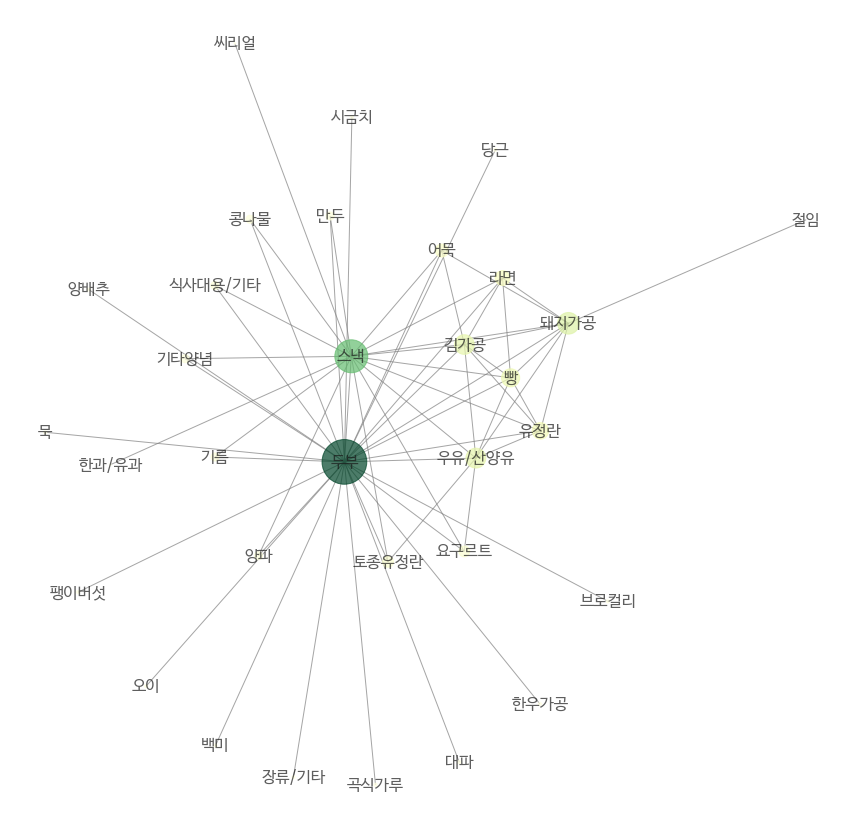

In [ ]:
making_network_func(ordered_statistics_list1)

In [ ]:
# making_network_func(ordered_statistics_list2)
# 하이퍼파라미터 바꾼 후 시각화 --> 추가적으로 해보기

ValueError: ignored